In [49]:
#pip install rdflib
import rdflib
from rdflib import Namespace , Literal , URIRef
from rdflib.namespace import RDF , RDFS
import pandas as pd
import numpy as np


In [2]:
# create an empty Graph
g = rdflib.Graph()

# parse a local RDF file by specifying the format
result = g.parse("25102022output.ttl")

In [ ]:
# Cultural phenomena in the dataset

In [ ]:
# count how many artworks have a certain phenomenon category and visualize it

In [51]:
cf_category_frequency = []
cq1 = '''
prefix data: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/> 
prefix sim: <https://w3id.org/simulation/ontology/>
prefix dul: <http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#>
prefix crm: <http://www.cidoc-crm.org/cidoc-crm/>

SELECT DISTINCT ?CFBroaderLabel (count(distinct ?artwork) as ?tot) WHERE {
  ?iconol icon:aboutWorkOfArt ?artwork;
  icon:recognizedIntrinsicMeaning ?intrinsic.
  ?intrinsic icon:recognizedCulturalPhenomenon ?meaning.
  ?meaning a icon:CulturalPhenomenon; crm:P2_has_type ?CFBroader. 
  ?CFBroader rdfs:label ?CFBroaderLabel .
}
GROUP BY ?CFBroaderLabel 
ORDER BY DESC(?tot)
'''

cq1res = g.query(cq1)
for row in cq1res: 
    cf_category_frequency.append([str(row[0]), int(row[1])])
    

In [65]:
df2 = pd.DataFrame(np.array(cf_category_frequency),
                   columns=['Cultural Phenomenon', 'Frequency'])
df2['Frequency'] = df2['Frequency'].astype(int)
result = df2.dtypes

print("Output:")
print(result)


Output:
Cultural Phenomenon    object
Frequency               int32
dtype: object


,Cultural Phenomenon,Frequency
0,Reception of Classical antiquity,203
1,Iconographical evolution,115
2,Formal or stylistic evolution,87
3,Formal or stylistic phenomenon,59
4,Iconographical interpretation,51
5,Tendency,39
6,Belief,30
7,Formal or stylistic influence,24
8,Cultural reinterpretation,17
9,Artist's expression,15


In [73]:
# df3 = df2.sort_values(by=['Frequency'], ascending=False)
df3 = df2.sort_index(ascending=False)
df3

,Cultural Phenomenon,Frequency
24,?,1
23,Formal or stylistical evolution,2
22,Formal or stylistical phenomenon,2
21,Cultural interpretation,2
20,Moral meaning,2
19,Iconographic interpretation,3
18,Taste,3
17,Humour,3
16,Cultural movement,4
15,Cultural value,7


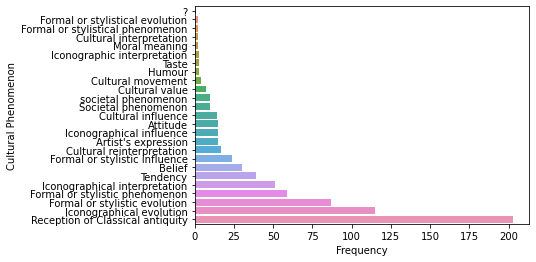

In [74]:
import seaborn as seaborn 
chart = seaborn.barplot(data=df3, x = 'Frequency', y='Cultural Phenomenon')

# Distribution of cultural phenomena

In [ ]:
cq1 = '''
prefix data: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/> 
prefix sim: <https://w3id.org/simulation/ontology/>
prefix dul: <http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#>
prefix crm: <http://www.cidoc-crm.org/cidoc-crm/>

SELECT DISTINCT ?meaning ?meaningLabel (count(distinct ?artwork) as ?tot) ?time WHERE {
  ?iconol icon:aboutWorkOfArt ?artwork;
  icon:recognizedIntrinsicMeaning ?intrinsic.
  ?intrinsic (icon:recognizedConceptualObject | icon:recognizedCulturalPhenomenon) ?meaning.
  ?meaning a icon:CulturalPhenomenon; rdfs:label ?meaningLabel .
  OPTIONAL {?cultObj crm:P65_shows_visual_item ?artwork.
          ?production crm:P108_has_produced ?cultObj;
          crm:P4_has_time_span ?time}
}
GROUP BY ?meaning 
ORDER BY DESC(?tot)
'''

cq1res = g.query(cq1)

# create a list with phenomena that appear in at least 5 artworks
well_represented_phenomena = []
well_represented_phenomena_and_counts = []
for row in cq1res:
  if int(row[2]) >= 9:
    well_represented_phenomena.append("<"+str(row[0])+">")
    well_represented_phenomena_and_counts.append((str(row[0]), row[2]))
    print(row[2], '-',row[1])

26 - Representation of classical content with contemporary formal motifs
23 - Renascences of classical antiquity in Western Art before the Renaissance
13 - Reintegration of classical style and content in the Italian Renaissance
12 - Iconographic evolution of classical subjects
12 - Iconographic evolution of the representation of the three-headed companion of Serapis
11 - Classical motifs recovery
10 - Classical subject matter represented in classical form
10 - The phenomenon called Principle of disjunction: whenever in the high and later Middle Ages a work of art borrows its form from a classical model, this form is almost invariably invested with a non-classical, normally Christian, significance; whenever in the high and later Middle Ages a work of art borrows its theme from classical poetry, legend, history or mythology, this theme is quite invariably presented in a non-classical, normally contemporary, form.
9 - Intrinsic classicism was created by the meeting of Gothic and Proto-Ren

Notes: they are a lot, which is ok. I'm wondering if some can be generalized, e.g. an artwork that exemplifies "Iconographic evolution of nudity" can also exemplify "Iconographic evolution of classical subjects". If so, can the artwork be associated to both phenomena?

In [4]:
# same query with general categories

cq1 = '''
prefix data: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/> 
prefix sim: <https://w3id.org/simulation/ontology/>
prefix dul: <http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#>
prefix crm: <http://www.cidoc-crm.org/cidoc-crm/>

SELECT DISTINCT ?CFbroader ?CFbroaderLabel (count(distinct ?artwork) as ?tot) ?time WHERE {
  ?iconol icon:aboutWorkOfArt ?artwork;
  icon:recognizedIntrinsicMeaning ?intrinsic.
  ?intrinsic icon:recognizedCulturalPhenomenon ?meaning.
  ?meaning a icon:CulturalPhenomenon; crm:P2_has_type ?CFbroader. 
?CFbroader rdfs:label ?CFbroaderLabel.
  OPTIONAL {?cultObj crm:P65_shows_visual_item ?artwork.
          ?production crm:P108_has_produced ?cultObj;
          crm:P4_has_time_span ?time}
}
GROUP BY ?CFbroader 
ORDER BY DESC(?tot)
'''

cq1res = g.query(cq1)

# create a list with phenomena that appear in at least 5 artworks
well_represented_phenomena = []
well_represented_phenomena_and_counts = []
for row in cq1res:
  if int(row[2]) >= 9:
    well_represented_phenomena.append("<"+str(row[0])+">")
    well_represented_phenomena_and_counts.append((str(row[0]), row[2]))
    print(row[2], '-',row[1])

203 - Reception of Classical antiquity
115 - Iconographical evolution
87 - Formal or stylistic evolution
59 - Formal or stylistic phenomenon
51 - Iconographical interpretation
39 - Tendency
30 - Belief
24 - Formal or stylistic influence
17 - Cultural reinterpretation
15 - Artist's expression
15 - Iconographical influence
15 - Attitude
14 - Cultural influence
10 - Societal phenomenon


In [5]:
well_represented_phenomena

['<http://icondataset.org/reception-of-classical-antiquity>',
 '<http://icondataset.org/iconographical-evolution>',
 '<http://icondataset.org/formal-or-stylistic-evolution>',
 '<http://icondataset.org/formal-or-stylistic-phenomenon>',
 '<http://icondataset.org/iconographical-interpretation>',
 '<http://icondataset.org/tendency>',
 '<http://icondataset.org/belief>',
 '<http://icondataset.org/formal-or-stylistic-influence>',
 '<http://icondataset.org/cultural-reinterpretation>',
 '<http://icondataset.org/artists-expression>',
 '<http://icondataset.org/iconographical-influence>',
 '<http://icondataset.org/attitude>',
 '<http://icondataset.org/cultural-influence>',
 '<http://icondataset.org/societal-phenomenon>']

# Subjects of well represented phenomena

Level 2 subjects associated to the most well represented cultural phenomena

In [6]:
cq2 = """
prefix d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/> 
prefix sim: <https://w3id.org/simulation/ontology/>
prefix dul: <http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#>
prefix crm: <http://www.cidoc-crm.org/cidoc-crm/>

SELECT DISTINCT ?meaning ?artwork ?subj2  WHERE {
  VALUES ?rel {icon:hasCharacter icon:hasEvent icon:hasNamedObject icon:hasPlace icon:hasPersonification icon:hasSymbol}
  VALUES ?meaning { """+ ' '.join(well_represented_phenomena) +"""}
  ?meaning ^icon:recognizedCulturalPhenomenon / ^icon:recognizedIntrinsicMeaning ?iconol .
  ?iconol icon:aboutWorkOfArt ?artwork .
  ?icrec icon:aboutWorkOfArt ?artwork; 
          a icon:IconographicalRecognition;
          icon:recognizedImage ?image.
  
  ?image ?rel ?subj2. 

  #OPTIONAL {
  #  ?icrec icon:aboutWorkOfArt ?artwork;
  #  a icon:IconographicalRecognition; icon:recognizedInvenzione ?subj2.
  #}

} 
""" 

cq2res = g.query(cq2)
#for row in cq2res:
#  print(row[0], '-',row[2], " -- meaning:", row[1])

In [ ]:
# same, takng cultural phenomena typologies


In [7]:
cq2 = """
prefix d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/> 
prefix sim: <https://w3id.org/simulation/ontology/>
prefix dul: <http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#>
prefix crm: <http://www.cidoc-crm.org/cidoc-crm/>

SELECT DISTINCT ?CFbroader ?CFbroaderLabel ?artwork ?subj2  WHERE {
  VALUES ?rel {icon:hasCharacter icon:hasEvent icon:hasNamedObject icon:hasPlace icon:hasPersonification icon:hasSymbol}
  VALUES ?CFbroader { """+ ' '.join(well_represented_phenomena) +"""}
  ?CFbroader ^crm:P2_has_type ?meaning.
  ?meaning ^icon:recognizedCulturalPhenomenon / ^icon:recognizedIntrinsicMeaning ?iconol .
  ?iconol icon:aboutWorkOfArt ?artwork .
  ?icrec icon:aboutWorkOfArt ?artwork; 
          a icon:IconographicalRecognition;
          icon:recognizedImage ?image.
 
  ?CFbroader rdfs:label ?CFbroaderLabel. 
  ?image ?rel ?subj2. 

  #OPTIONAL {
  #  ?icrec icon:aboutWorkOfArt ?artwork;
  #  a icon:IconographicalRecognition; icon:recognizedInvenzione ?subj2.
  #}

} 
""" 

cq2res = g.query(cq2)
for row in cq2res:
  print(row[0], '-',row[3], " -- meaning:", row[1])

http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/argus  -- meaning: Reception of Classical antiquity
http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/vulcan  -- meaning: Reception of Classical antiquity
http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/the-three-graces  -- meaning: Reception of Classical antiquity
http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/silenus  -- meaning: Reception of Classical antiquity
http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/pygmalion  -- meaning: Reception of Classical antiquity
http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/archangel-gabriel  -- meaning: Reception of Classical antiquity
http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/venus  -- meaning: Reception of Classical antiquity
http://icondataset.org/reception-of-cla

http://icondataset.org/formal-or-stylistic-evolution - http://icondataset.org/the-three-graces  -- meaning: Formal or stylistic evolution
http://icondataset.org/formal-or-stylistic-evolution - http://icondataset.org/centaur  -- meaning: Formal or stylistic evolution
http://icondataset.org/formal-or-stylistic-evolution - http://icondataset.org/centaur  -- meaning: Formal or stylistic evolution
http://icondataset.org/formal-or-stylistic-evolution - http://icondataset.org/prometheus  -- meaning: Formal or stylistic evolution
http://icondataset.org/formal-or-stylistic-evolution - http://icondataset.org/vulcan  -- meaning: Formal or stylistic evolution
http://icondataset.org/formal-or-stylistic-evolution - http://icondataset.org/polyxena  -- meaning: Formal or stylistic evolution
http://icondataset.org/formal-or-stylistic-evolution - http://icondataset.org/jupiter  -- meaning: Formal or stylistic evolution
http://icondataset.org/formal-or-stylistic-evolution - http://icondataset.org/mercury

http://icondataset.org/tendency - http://icondataset.org/christ-as-a-child  -- meaning: Tendency
http://icondataset.org/tendency - http://icondataset.org/leach  -- meaning: Tendency
http://icondataset.org/tendency - http://icondataset.org/aeolus  -- meaning: Tendency
http://icondataset.org/belief - http://icondataset.org/moses  -- meaning: Belief
http://icondataset.org/belief - http://icondataset.org/aeolus  -- meaning: Belief
http://icondataset.org/belief - http://icondataset.org/mercury  -- meaning: Belief
http://icondataset.org/belief - http://icondataset.org/angels  -- meaning: Belief
http://icondataset.org/belief - http://icondataset.org/nymphs  -- meaning: Belief
http://icondataset.org/belief - http://icondataset.org/centaur  -- meaning: Belief
http://icondataset.org/belief - http://icondataset.org/centaur  -- meaning: Belief
http://icondataset.org/belief - http://icondataset.org/satyr  -- meaning: Belief
http://icondataset.org/belief - http://icondataset.org/the-three-graces  --

http://icondataset.org/attitude - http://icondataset.org/cupid  -- meaning: Attitude
http://icondataset.org/attitude - http://icondataset.org/europa  -- meaning: Attitude
http://icondataset.org/attitude - http://icondataset.org/roman-emperors  -- meaning: Attitude
http://icondataset.org/attitude - http://icondataset.org/planetary-deities  -- meaning: Attitude
http://icondataset.org/cultural-influence - http://icondataset.org/hecuba  -- meaning: Cultural influence
http://icondataset.org/cultural-influence - http://icondataset.org/cupid  -- meaning: Cultural influence
http://icondataset.org/cultural-influence - http://icondataset.org/troilus  -- meaning: Cultural influence
http://icondataset.org/cultural-influence - http://icondataset.org/mary  -- meaning: Cultural influence
http://icondataset.org/cultural-influence - http://icondataset.org/saints  -- meaning: Cultural influence
http://icondataset.org/cultural-influence - http://icondataset.org/moses  -- meaning: Cultural influence
http:

http://icondataset.org/iconographical-interpretation - http://icondataset.org/tantalus-vainly-reaching-for-the-water  -- meaning: Iconographical interpretation
http://icondataset.org/iconographical-interpretation - http://icondataset.org/the-nymphs-help-vulcan-precipitated-from-mount-olympus-onto-the-island-of-lemnos  -- meaning: Iconographical interpretation
http://icondataset.org/iconographical-interpretation - http://icondataset.org/the-age-of-stone  -- meaning: Iconographical interpretation
http://icondataset.org/iconographical-interpretation - http://icondataset.org/era-ante-vulcanum  -- meaning: Iconographical interpretation
http://icondataset.org/iconographical-interpretation - http://icondataset.org/saturn-devouring-a-living-child  -- meaning: Iconographical interpretation
http://icondataset.org/iconographical-interpretation - http://icondataset.org/saturn-devouring-a-living-child  -- meaning: Iconographical interpretation
http://icondataset.org/iconographical-interpretation - 

http://icondataset.org/societal-phenomenon - http://icondataset.org/era-sub-vulcano  -- meaning: societal phenomenon
http://icondataset.org/societal-phenomenon - http://icondataset.org/faith-has-the-world-under-her-feet  -- meaning: societal phenomenon
http://icondataset.org/societal-phenomenon - http://icondataset.org/eros-and-anteros-fishing-for-hearts  -- meaning: Societal phenomenon
http://icondataset.org/societal-phenomenon - http://icondataset.org/the-age-of-metal  -- meaning: Societal phenomenon
http://icondataset.org/societal-phenomenon - http://icondataset.org/aeolus-seals-the-naughty-winds-into-the-wine-skins  -- meaning: Societal phenomenon
http://icondataset.org/societal-phenomenon - http://icondataset.org/vulcan-with-his-helpers-are-already-at-work-in-mid-career-of-night-when-ordinary-people-are-still-asleep  -- meaning: Societal phenomenon
http://icondataset.org/societal-phenomenon - http://icondataset.org/aeolus-working-two-blacksmiths-bellows  -- meaning: societal pheno

http://icondataset.org/iconographical-influence - http://icondataset.org/lion-zodiacal-sign  -- meaning: Iconographical influence
http://icondataset.org/iconographical-influence - http://icondataset.org/imperial-orb  -- meaning: Iconographical influence
http://icondataset.org/iconographical-influence - http://icondataset.org/lion-zodiacal-sign  -- meaning: Iconographical influence
http://icondataset.org/iconographical-influence - http://icondataset.org/algol-head-of-demon  -- meaning: Iconographical influence
http://icondataset.org/attitude - http://icondataset.org/the-tomb-of-king-ninus  -- meaning: Attitude
http://icondataset.org/cultural-influence - http://icondataset.org/lion-zodiacal-sign  -- meaning: Cultural influence
http://icondataset.org/cultural-influence - http://icondataset.org/algol-head-of-demon  -- meaning: Cultural influence
http://icondataset.org/societal-phenomenon - http://icondataset.org/altar  -- meaning: Societal phenomenon
http://icondataset.org/societal-phenome

http://icondataset.org/formal-or-stylistic-phenomenon - http://icondataset.org/atlas  -- meaning: Formal or stylistic phenomenon
http://icondataset.org/iconographical-interpretation - http://icondataset.org/futile-and-treacherous-pleasure  -- meaning: Iconographical interpretation
http://icondataset.org/iconographical-interpretation - http://icondataset.org/voluptas  -- meaning: Iconographical interpretation
http://icondataset.org/iconographical-interpretation - http://icondataset.org/time-the-revealer  -- meaning: Iconographical interpretation
http://icondataset.org/iconographical-interpretation - http://icondataset.org/contemplative-mind  -- meaning: Iconographical interpretation
http://icondataset.org/iconographical-interpretation - http://icondataset.org/time-the-destroyer  -- meaning: Iconographical interpretation
http://icondataset.org/iconographical-interpretation - http://icondataset.org/time-ripa  -- meaning: Iconographical interpretation
http://icondataset.org/iconographical-

http://icondataset.org/attitude - http://icondataset.org/chastity  -- meaning: Attitude
http://icondataset.org/attitude - http://icondataset.org/the-constellation-hercules  -- meaning: Attitude
http://icondataset.org/cultural-influence - http://icondataset.org/time-the-revealer  -- meaning: Cultural influence
http://icondataset.org/cultural-influence - http://icondataset.org/victories  -- meaning: Cultural influence
http://icondataset.org/cultural-influence - http://icondataset.org/the-constellation-hercules  -- meaning: Cultural influence
http://icondataset.org/cultural-influence - http://icondataset.org/the-twins-constellation  -- meaning: Cultural influence
http://icondataset.org/cultural-influence - http://icondataset.org/the-constellation-perseus  -- meaning: Cultural influence
http://icondataset.org/cultural-influence - http://icondataset.org/fraude  -- meaning: Cultural influence
http://icondataset.org/cultural-influence - http://icondataset.org/pleasure  -- meaning: Cultural in

http://icondataset.org/formal-or-stylistic-phenomenon - http://icondataset.org/temple-of-solomon-ornate-as-a-church-correlation-between-the-old-testament-and-the-new  -- meaning: Formal or stylistic phenomenon
http://icondataset.org/formal-or-stylistic-phenomenon - http://icondataset.org/urns-pagan-custom-of-cremation  -- meaning: Formal or stylistic phenomenon
http://icondataset.org/formal-or-stylistic-phenomenon - http://icondataset.org/tombs-christian-rite-of-burial  -- meaning: Formal or stylistic phenomenon
http://icondataset.org/iconographical-interpretation - http://icondataset.org/tantalus-avarice  -- meaning: Iconographical interpretation
http://icondataset.org/iconographical-interpretation - http://icondataset.org/branches-of-a-tree-antidotes-against-sexual-passion-marriage-prayer-business-abstinence  -- meaning: Iconographical interpretation
http://icondataset.org/iconographical-interpretation - http://icondataset.org/wolf-greed  -- meaning: Iconographical interpretation
htt

http://icondataset.org/iconographical-influence - http://icondataset.org/two-graces-facing-the-observer-favor-returned-twofold  -- meaning: Iconographical influence
http://icondataset.org/iconographical-influence - http://icondataset.org/the-grace-turning-his-back-favor-conferred  -- meaning: Iconographical influence
http://icondataset.org/attitude - http://icondataset.org/bull-christ  -- meaning: Attitude
http://icondataset.org/attitude - http://icondataset.org/europa-human-soul  -- meaning: Attitude
http://icondataset.org/cultural-influence - http://icondataset.org/sitting-down-on-a-lion-quando-est-in-leone  -- meaning: Cultural influence
http://icondataset.org/cultural-influence - http://icondataset.org/pillow-idleness-and-lechery  -- meaning: Cultural influence
http://icondataset.org/cultural-influence - http://icondataset.org/a-pair-of-masks-one-of-a-young-woman-the-other-of-a-old-malevolent-man-worldliness-insincerity-falsehood  -- meaning: Cultural influence
http://icondataset.o

In [8]:
from collections import defaultdict , Counter

meanings_subjects = defaultdict(list)
# ?meaning ?artwork ?subj2
for row in cq2res:
  meanings_subjects[str(row['CFbroader'])].append(str(row['subj2']))

meanings_subjects_with_counts = {}
for k,v in meanings_subjects.items():
  for m,c in well_represented_phenomena_and_counts:
    if k == m:
      meanings_subjects_with_counts[k+" ("+c+")"] = dict(Counter(v).most_common())

# add count

meanings_subjects_with_counts

{'http://icondataset.org/reception-of-classical-antiquity (203)': {'http://icondataset.org/saturn': 16,
  'http://icondataset.org/cupid': 14,
  'http://icondataset.org/mercury': 11,
  'http://icondataset.org/venus': 8,
  'http://icondataset.org/apollo': 8,
  'http://icondataset.org/jupiter': 8,
  'http://icondataset.org/companion-of-serapis': 7,
  'http://icondataset.org/the-constellation-hercules': 6,
  'http://icondataset.org/blindfold-cupid': 5,
  'http://icondataset.org/saturn-devouring-a-living-child': 5,
  'http://icondataset.org/caduceus': 5,
  'http://icondataset.org/the-three-graces': 4,
  'http://icondataset.org/pluto': 4,
  'http://icondataset.org/mary': 4,
  'http://icondataset.org/bacchus': 4,
  'http://icondataset.org/satyr': 4,
  'http://icondataset.org/people/virgil': 4,
  'http://icondataset.org/era-sub-vulcano': 4,
  'http://icondataset.org/death': 4,
  'http://icondataset.org/vulcan': 3,
  'http://icondataset.org/silenus': 3,
  'http://icondataset.org/centaur': 3,
  

In [23]:
frequent_subj_per_cf = {}
for item in meanings_subjects_with_counts.items():
    for pair in item[1].items(): 
        if int(pair[1]) >= 10:
            print(item[0], pair)
           # if item[0] not in frequent_subj_per_cf:
            #    frequent_subj_per_cf[item[0]] = {pair}
           # else: 
                
      

http://icondataset.org/reception-of-classical-antiquity (203) ('http://icondataset.org/saturn', 16)
http://icondataset.org/reception-of-classical-antiquity (203) ('http://icondataset.org/cupid', 14)
http://icondataset.org/reception-of-classical-antiquity (203) ('http://icondataset.org/mercury', 11)
http://icondataset.org/iconographical-evolution (115) ('http://icondataset.org/saturn', 16)
http://icondataset.org/iconographical-evolution (115) ('http://icondataset.org/cupid', 14)
http://icondataset.org/iconographical-interpretation (51) ('http://icondataset.org/cupid', 10)


Result analysis. They are all classical deities. In fact, nearly half on the phenomena are about the reception of classical antiquity. Maybe we can see how classical subjects evolve over time. 

|CF | CF frequency | lev 2 | lev 2 frequency |percentage of lev 2 in cf|
|---|--------------|-------|------------------|----|
|reception of classical antiquity |203 | cupid | 14| 7% |
|reception of classical antiquity |203 | mercury | 11| 5% |
|iconographical evolution |115| saturn | 16| 14% |
|iconographical evolution |115| cupid | 14| 12% |
|iconographical interpretation |51| cupid| 10| 20% |


Spontaneous question: which are the main "areas" (e.g. classical antiquity, christianity) in the dataset? how much are they represented? 

In [32]:
frequent_subj_per_cf = {}
for item in meanings_subjects_with_counts.items():
    for pair in item[1].items(): 
        if int(pair[1]) >= 5:
            print(item[0], pair)
           # if item[0] not in frequent_subj_per_cf:
            #    frequent_subj_per_cf[item[0]] = {pair}
           # else: 
                
      

http://icondataset.org/reception-of-classical-antiquity (203) ('http://icondataset.org/saturn', 16)
http://icondataset.org/reception-of-classical-antiquity (203) ('http://icondataset.org/cupid', 14)
http://icondataset.org/reception-of-classical-antiquity (203) ('http://icondataset.org/mercury', 11)
http://icondataset.org/reception-of-classical-antiquity (203) ('http://icondataset.org/venus', 8)
http://icondataset.org/reception-of-classical-antiquity (203) ('http://icondataset.org/apollo', 8)
http://icondataset.org/reception-of-classical-antiquity (203) ('http://icondataset.org/jupiter', 8)
http://icondataset.org/reception-of-classical-antiquity (203) ('http://icondataset.org/companion-of-serapis', 7)
http://icondataset.org/reception-of-classical-antiquity (203) ('http://icondataset.org/the-constellation-hercules', 6)
http://icondataset.org/reception-of-classical-antiquity (203) ('http://icondataset.org/blindfold-cupid', 5)
http://icondataset.org/reception-of-classical-antiquity (203) (

In [40]:
meanings_subjects_with_counts

{'http://icondataset.org/reception-of-classical-antiquity (203)': {'http://icondataset.org/saturn': 16,
  'http://icondataset.org/cupid': 14,
  'http://icondataset.org/mercury': 11,
  'http://icondataset.org/venus': 8,
  'http://icondataset.org/apollo': 8,
  'http://icondataset.org/jupiter': 8,
  'http://icondataset.org/companion-of-serapis': 7,
  'http://icondataset.org/the-constellation-hercules': 6,
  'http://icondataset.org/blindfold-cupid': 5,
  'http://icondataset.org/saturn-devouring-a-living-child': 5,
  'http://icondataset.org/caduceus': 5,
  'http://icondataset.org/the-three-graces': 4,
  'http://icondataset.org/pluto': 4,
  'http://icondataset.org/mary': 4,
  'http://icondataset.org/bacchus': 4,
  'http://icondataset.org/satyr': 4,
  'http://icondataset.org/people/virgil': 4,
  'http://icondataset.org/era-sub-vulcano': 4,
  'http://icondataset.org/death': 4,
  'http://icondataset.org/vulcan': 3,
  'http://icondataset.org/silenus': 3,
  'http://icondataset.org/centaur': 3,
  

In [44]:
# tpo 10 most frequent subjects per cf
top_5_subj_per_cf = {}
for item in meanings_subjects_with_counts.items():
    if item[0] not in top_5_subj_per_cf:
        top_5_subj_per_cf[item[0]] = {}
        for pair in item[1].items(): 
            if len(top_5_subj_per_cf[item[0]]) < 5:
                top_5_subj_per_cf[item[0]][pair[0]] = pair[1]
               
top_5_subj_per_cf   

{'http://icondataset.org/reception-of-classical-antiquity (203)': {'http://icondataset.org/saturn': 16,
  'http://icondataset.org/cupid': 14,
  'http://icondataset.org/mercury': 11,
  'http://icondataset.org/venus': 8,
  'http://icondataset.org/apollo': 8},
 'http://icondataset.org/iconographical-evolution (115)': {'http://icondataset.org/saturn': 16,
  'http://icondataset.org/cupid': 14,
  'http://icondataset.org/companion-of-serapis': 8,
  'http://icondataset.org/blindfold-cupid': 6,
  'http://icondataset.org/apollo': 6},
 'http://icondataset.org/formal-or-stylistic-evolution (87)': {'http://icondataset.org/mercury': 8,
  'http://icondataset.org/era-sub-vulcano': 4,
  'http://icondataset.org/satyr': 3,
  'http://icondataset.org/saturn': 3,
  'http://icondataset.org/apollo': 3},
 'http://icondataset.org/formal-or-stylistic-phenomenon (59)': {'http://icondataset.org/mary': 2,
  'http://icondataset.org/christ': 2,
  'http://icondataset.org/archangel-gabriel': 1,
  'http://icondataset.or

In [17]:
# experiment 1. correlation of cf-level2 subj . lists too long, memory error
final_lists = []
for k,v in meanings_subjects.items(): 
        l = v
        final_lists.append(l)

In [18]:
print(final_lists)

[['http://icondataset.org/argus', 'http://icondataset.org/vulcan', 'http://icondataset.org/the-three-graces', 'http://icondataset.org/silenus', 'http://icondataset.org/pygmalion', 'http://icondataset.org/archangel-gabriel', 'http://icondataset.org/venus', 'http://icondataset.org/thisbe', 'http://icondataset.org/cupid', 'http://icondataset.org/ganymede', 'http://icondataset.org/saturn', 'http://icondataset.org/vulcan', 'http://icondataset.org/cupid', 'http://icondataset.org/marine-snakes', 'http://icondataset.org/mercury', 'http://icondataset.org/mercury', 'http://icondataset.org/troilus', 'http://icondataset.org/blindfold-cupid', 'http://icondataset.org/companion-of-serapis', 'http://icondataset.org/pluto', 'http://icondataset.org/sisyphus', 'http://icondataset.org/apollo', 'http://icondataset.org/mary', 'http://icondataset.org/blindfold-cupid', 'http://icondataset.org/muses', 'http://icondataset.org/natural-venus', 'http://icondataset.org/paris', 'http://icondataset.org/saturn', 'http

In [20]:

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
import pandas as pd


dataset = final_lists

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df, min_support=0.15, use_colnames=True)
frequent_itemsets

MemoryError: cannot allocate array memory

In [3]:
# same, with categories of subjects


cq2 = """
prefix d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/> 
prefix sim: <https://w3id.org/simulation/ontology/>
prefix dul: <http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#>
prefix crm: <http://www.cidoc-crm.org/cidoc-crm/>
prefix skos: <http://www.w3.org/2004/02/skos/core#>

SELECT DISTINCT ?CFbroader ?CFbroaderLabel ?artwork ?subj2 ?subj2Broader WHERE {
  VALUES ?rel {icon:hasCharacter icon:hasEvent icon:hasNamedObject icon:hasPlace icon:hasPersonification icon:hasSymbol}
  VALUES ?CFbroader { """+ ' '.join(well_represented_phenomena) +"""}
  ?CFbroader ^crm:P2_has_type ?meaning.
  ?meaning ^icon:recognizedCulturalPhenomenon / ^icon:recognizedIntrinsicMeaning ?iconol .
  ?iconol icon:aboutWorkOfArt ?artwork .
  ?icrec icon:aboutWorkOfArt ?artwork; 
          a icon:IconographicalRecognition; 
          icon:recognizedImage ?image. 
  ?CFbroader rdfs:label ?CFbroaderLabel. 
  ?image ?rel ?subj2. 

  OPTIONAL {?subj2 skos:broader ?subj2Broader }
  OPTIONAL {?invenzione skos:broader ?invenzioneBroader }

} 
""" 

cq2res = g.query(cq2)
for row in cq2res:
  print(row[0], '-',row[3], "has broader subject: ", row[4], " -- meaning:", row[1])

NameError: name 'well_represented_phenomena' is not defined

Notes: there are too many subjects to see a pattern, I'd try to group them by type, manually, in a second iteration? e.g. greek gods, places, mythological figures, landscape, and so on.

Question: is it possible that you have many artworks without subjects of level 2? Look for instance at http://icondataset.org/CF1327, which is associated to 10 artworks, but all subjects appear in one artwork only. Answer: they appear in all the artworks only once. 

You can use the same method to query subjects of level 1.

# cultural phenomena correlation with stories and allegories

In [82]:
# same, with categories of subjects


cq2 = """
prefix d: <http://icondataset.org/> 
PREFIX icon: <https://w3id.org/icon/ontology/> 
prefix sim: <https://w3id.org/simulation/ontology/>
prefix dul: <http://www.ontologydesignpatterns.org/ont/dul/DUL.owl#>
prefix crm: <http://www.cidoc-crm.org/cidoc-crm/>
prefix skos: <http://www.w3.org/2004/02/skos/core#>

SELECT DISTINCT ?CFbroader ?CFbroaderLabel ?artwork ?invenzione ?invenzioneBroader ?type WHERE {
  VALUES ?rel {icon:hasCharacter icon:hasEvent icon:hasNamedObject icon:hasPlace icon:hasPersonification icon:hasSymbol}
  VALUES ?CFbroader { """+ ' '.join(well_represented_phenomena) +"""}
  ?CFbroader ^crm:P2_has_type ?meaning; rdfs:label ?CFbroaderLabel. 
  ?meaning ^icon:recognizedCulturalPhenomenon / ^icon:recognizedIntrinsicMeaning ?iconol .
  ?iconol icon:aboutWorkOfArt ?artwork .
  ?icrec icon:aboutWorkOfArt ?artwork; 
          a icon:IconographicalRecognition; 
          icon:recognizedInvenzione ?invenzione. 
  ?invenzione rdfs:label ?invenzioneLabel; a ?type. 

  OPTIONAL {?invenzione skos:broader ?invenzioneBroader }
  OPTIONAL {?invenzione skos:broader ?invenzioneBroader. ?invenzioneBroader  rdfs:label ?invenzioneBroaderLabel }

} 
""" 

cq2res = g.query(cq2)
for row in cq2res:
  #print(row)  
    print(row[0], '-',row[3],"has type: ", row[5], "has broader: ", row[4], " -- meaning:", row[1])
    if row[4] != "None": 
        inv = row[4]
    else: 
        inv = row[3]
    

http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/saturn-devouring-his-children has type:  https://w3id.org/icon/ontology/Story has broader:  http://icondataset.org/classical-mythology-and-ancient-history  -- meaning: Reception of Classical antiquity
http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/saturn-devouring-his-children has type:  https://w3id.org/icon/ontology/Story has broader:  http://icondataset.org/story-of-saturn  -- meaning: Reception of Classical antiquity
http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/allegory-of-good-counsel has type:  https://w3id.org/icon/ontology/Allegory has broader:  None  -- meaning: Reception of Classical antiquity
http://icondataset.org/reception-of-classical-antiquity - http://icondataset.org/abduction-of-helen has type:  https://w3id.org/icon/ontology/Story has broader:  http://icondataset.org/classical-mythology-and-ancient-history  -- meaning: 

http://icondataset.org/iconographical-interpretation - http://icondataset.org/bacchus-discovers-the-honey has type:  https://w3id.org/icon/ontology/Story has broader:  http://icondataset.org/story-of-bacchus  -- meaning: Iconographical interpretation
http://icondataset.org/iconographical-interpretation - http://icondataset.org/blind-fortune-blindfolding-cupid-and-putting-him-on-a-sphere-to-symbolize-that-affection-changes-with-luck has type:  https://w3id.org/icon/ontology/Allegory has broader:  None  -- meaning: Iconographical interpretation
http://icondataset.org/iconographical-interpretation - http://icondataset.org/saturn-devouring-his-children has type:  https://w3id.org/icon/ontology/Story has broader:  http://icondataset.org/classical-mythology-and-ancient-history  -- meaning: Iconographical interpretation
http://icondataset.org/iconographical-interpretation - http://icondataset.org/saturn-devouring-his-children has type:  https://w3id.org/icon/ontology/Story has broader:  http:

In [89]:
from collections import defaultdict , Counter

meanings_inv = defaultdict(list)
# ?meaning ?artwork ?subj2
for row in cq2res:
    if row[4] == None: 
        inv = str(row[3])
    else: 
        inv = (row[4])
    meanings_inv[str(row['CFbroader'])].append(inv)

meanings_inv_with_counts = {}
for k,v in meanings_inv.items():
  for m,c in well_represented_phenomena_and_counts:
    if k == m:
      meanings_inv_with_counts[k+" ("+c+")"] = dict(Counter(v).most_common())

# add count

meanings_inv_with_counts

{'http://icondataset.org/reception-of-classical-antiquity (203)': {rdflib.term.URIRef('http://icondataset.org/classical-mythology-and-ancient-history'): 22,
  rdflib.term.URIRef('http://icondataset.org/story-of-saturn'): 6,
  rdflib.term.URIRef('http://icondataset.org/love-affairs-of-jupiter'): 5,
  rdflib.term.URIRef('http://icondataset.org/bible'): 3,
  'http://icondataset.org/the-nymphs-help-vulcan-precipitated-from-mount-olympus-onto-the-island-of-lemnos': 2,
  rdflib.term.URIRef('http://icondataset.org/love-affairs-of-pluto'): 2,
  'http://icondataset.org/luxury': 2,
  'http://icondataset.org/allegory-of-good-counsel': 1,
  rdflib.term.URIRef('http://icondataset.org/story-of-hercules'): 1,
  rdflib.term.URIRef('http://icondataset.org/legend'): 1,
  'http://icondataset.org/the-realm-of-the-natural-venus': 1,
  rdflib.term.URIRef('http://icondataset.org/story-of-bacchus'): 1,
  rdflib.term.URIRef('http://icondataset.org/story-of-pygmalion'): 1,
  'http://icondataset.org/allegory-of-

In [90]:
# tpo 10 most frequent subjects per cf
top_5_inv_per_cf = {}
for item in meanings_inv_with_counts.items():
    if item[0] not in top_5_inv_per_cf:
        top_5_inv_per_cf[item[0]] = {}
        for pair in item[1].items(): 
            if len(top_5_inv_per_cf[item[0]]) < 5:
                top_5_inv_per_cf[item[0]][pair[0]] = pair[1]
               
top_5_inv_per_cf  

{'http://icondataset.org/reception-of-classical-antiquity (203)': {rdflib.term.URIRef('http://icondataset.org/classical-mythology-and-ancient-history'): 22,
  rdflib.term.URIRef('http://icondataset.org/story-of-saturn'): 6,
  rdflib.term.URIRef('http://icondataset.org/love-affairs-of-jupiter'): 5,
  rdflib.term.URIRef('http://icondataset.org/bible'): 3,
  'http://icondataset.org/the-nymphs-help-vulcan-precipitated-from-mount-olympus-onto-the-island-of-lemnos': 2},
 'http://icondataset.org/iconographical-evolution (115)': {rdflib.term.URIRef('http://icondataset.org/classical-mythology-and-ancient-history'): 14,
  rdflib.term.URIRef('http://icondataset.org/story-of-saturn'): 6,
  'http://icondataset.org/luxury': 2,
  rdflib.term.URIRef('http://icondataset.org/bible'): 2,
  rdflib.term.URIRef('http://icondataset.org/passion-of-christ'): 2},
 'http://icondataset.org/formal-or-stylistic-evolution (87)': {rdflib.term.URIRef('http://icondataset.org/classical-mythology-and-ancient-history'): 1

In [ ]:
# repeat dividing for stories and allegories